In [1]:
# Import the necessary libraries

# Data Connection
import pyodbc
from dotenv import dotenv_values

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Stats Packages
# from scipy.stats import stats


# Others
from datetime import datetime
import os
from itertools import product
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings('ignore')

print("PACKAGE SUCCESS!! 🎉")

PACKAGE SUCCESS!! 🎉


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("user")
password = environment_variables.get("password")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [3]:
# Get the cursor
# The connection cursor is used to execute statements to communicate with the MySQL database
cursor = connection.cursor()
# Retrieve the table names
table_names = cursor.tables(tableType='TABLE')
# Fetch all the table names
tables = table_names.fetchall()
# Print the table names
for table in tables:
    print(table.table_name)

Sales_August_2019
Sales_December_2019
Sales_July_2019
Sales_November_2019
Sales_October_2019
Sales_September_2019
change_streams_destination_type
change_streams_partition_scheme
trace_xe_action_map
trace_xe_event_map


In [4]:
# sql query to get the datasets
query = "SELECT * FROM Sales_August_2019"
query2 = "SELECT * FROM Sales_December_2019"
query3 = "SELECT * FROM Sales_July_2019"
query4 = "SELECT * FROM Sales_November_2019"
query5 = "SELECT * FROM Sales_October_2019"
query6 = "SELECT * FROM Sales_September_2019"

aug=pd.read_sql(query,connection)
dec=pd.read_sql(query2,connection)
jul=pd.read_sql(query3,connection)
nov=pd.read_sql(query4,connection)
oct=pd.read_sql(query5,connection)
sep=pd.read_sql(query6,connection)

In [5]:
# save tables to csv
aug.to_csv('data\Sales_August_2019.csv', index=False)
dec.to_csv('data\Sales_December_2019.csv', index=False)
jul.to_csv('data\Sales_July_2019.csv', index=False)
nov.to_csv('data\Sales_November_2019.csv', index=False)
oct.to_csv('data\Sales_October_2019.csv', index=False)
sep.to_csv('data\Sales_September_2019.csv', index=False)

In [6]:
apr = pd.read_csv('data/Sales_April_2019.csv')
feb = pd.read_csv('data/Sales_February_2019.csv')
jan = pd.read_csv('data/Sales_January_2019.csv')
jun = pd.read_csv('data/Sales_June_2019.csv')
mar = pd.read_csv('data/Sales_March_2019.csv')
may = pd.read_csv('data\Sales_May_2019.csv')

In [7]:
apr = pd.DataFrame(apr)
feb = pd.DataFrame(feb)
jan = pd.DataFrame(jan)
jun = pd.DataFrame(jun)
mar = pd.DataFrame(mar)
may = pd.DataFrame(may)

In [8]:
jan.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


In [9]:
jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [10]:
jan.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [11]:
first_half = pd.concat([jan, feb, mar, apr, may, jun], ignore_index=True)
first_half

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [12]:
first_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [13]:
first_half.isna().sum()

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

In [14]:
first_half = first_half.dropna()
first_half.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
first_half.duplicated().sum()
first_half.drop_duplicates()
first_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85380 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [16]:
first_half.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [17]:
first_half['Quantity Ordered'].value_counts()

Quantity Ordered
1                   77205
2                    6147
3                    1357
4                     357
Quantity Ordered      160
5                     117
6                      29
7                       7
9                       1
Name: count, dtype: int64

In [18]:
object_to_delete = 'Quantity Ordered'
rows = first_half[first_half['Quantity Ordered'] == object_to_delete]
first_half = first_half.drop(rows.index)

In [19]:
first_half['Order Date'] = pd.to_datetime(first_half['Order Date'])

In [20]:
first_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85220 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          85220 non-null  object        
 1   Product           85220 non-null  object        
 2   Quantity Ordered  85220 non-null  object        
 3   Price Each        85220 non-null  object        
 4   Order Date        85220 non-null  datetime64[ns]
 5   Purchase Address  85220 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.6+ MB


In [21]:
first_half['Order ID'] = pd.to_numeric(first_half['Order ID'], errors='coerce')
first_half['Quantity Ordered'] = pd.to_numeric(first_half['Quantity Ordered'], errors='coerce')
first_half['Price Each'] = pd.to_numeric(first_half['Price Each'], errors='coerce')

In [22]:
first_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85220 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          85220 non-null  int64         
 1   Product           85220 non-null  object        
 2   Quantity Ordered  85220 non-null  int64         
 3   Price Each        85220 non-null  float64       
 4   Order Date        85220 non-null  datetime64[ns]
 5   Purchase Address  85220 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [23]:
jul.head(1)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,"222,910.00",Apple Airpods Headphones,1.00,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"


In [24]:
first_half = first_half.rename(columns={'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'})

In [25]:
second_half = pd.concat([jul, aug, sep, oct, nov, dec])
second_half.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,"222,910.00",Apple Airpods Headphones,1.00,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,"222,911.00",Flatscreen TV,1.00,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"


In [26]:
second_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [27]:
second_half['Order_Date'] = second_half['Order_Date'].str[2:]

In [28]:
second_half

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,"222,910.00",Apple Airpods Headphones,1.00,150.00,26-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,"222,911.00",Flatscreen TV,1.00,300.00,05-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,"222,912.00",AA Batteries (4-pack),1.00,3.84,29-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,"222,913.00",AA Batteries (4-pack),1.00,3.84,28-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,"222,914.00",AAA Batteries (4-pack),5.00,2.99,31-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
25112,"319,666.00",Lightning Charging Cable,1.00,14.95,11-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,"319,667.00",AA Batteries (4-pack),2.00,3.84,01-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,"319,668.00",Vareebadd Phone,1.00,400.00,09-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,"319,669.00",Wired Headphones,1.00,11.99,03-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [29]:
second_half.isna().sum()

Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64

In [30]:
second_half = second_half.dropna()

In [31]:
second_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100730 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100730 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100730 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [32]:
second_half['Order_ID'] = second_half['Order_ID'].astype(int)
second_half['Quantity_Ordered'] = second_half['Quantity_Ordered'].astype(int)
second_half['Order_Date'] = pd.to_datetime(second_half['Order_Date'], errors='coerce')

In [33]:
second_half.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.00,2019-05-07 08:55:00,"590 4th St, Seattle, WA 98101"


In [72]:
df = pd.concat([first_half, second_half])

In [73]:
df.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [74]:
df.drop_duplicates()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-11-12 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-01-12 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,2019-09-12 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-03-12 10:39:00,"778 River St, Dallas, TX 75001"


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [76]:
df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

## Feature Imputation

#### Mapping items to form Categories

In [77]:
mapping = {
    'USB-C Charging Cable': 'Charging Cables',
    'Lightning Charging Cable': 'Charging Cables',
    'AAA Batteries (4-pack)': 'Batteries',
    'AA Batteries (4-pack)': 'Batteries',
    'Wired Headphones': 'Headphones',
    'Apple Airpods Headphones': 'Headphones',
    'Bose SoundSport Headphones': 'Headphones',
    '27in FHD Monitor': 'Monitors',
    '27in 4K Gaming Monitor': 'Monitors',
    '34in Ultrawide Monitor': 'Monitors',
    '20in Monitor': 'Monitors',
    'iPhone': 'Mobile Phones',
    'Google Phone': 'Mobile Phones',
    'Vareebadd Phone': 'Mobile Phones',
    'Flatscreen TV': 'Televisions',
    'Macbook Pro Laptop': 'Laptops',
    'ThinkPad Laptop': 'Laptops',
    'LG Washing Machine': 'Home Appliances',
    'LG Dryer': 'Home Appliances'
}

In [78]:
df['Category'] = df['Product'].map(mapping)

#### Mapping by item value

In [79]:
df['Level'] = np.where(df['Price_Each'] > 99, 'High level', 'Basic level')

#### Computing a Sales column

In [80]:
df['Sales'] = df['Price_Each']*df['Quantity_Ordered']

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 25116
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
 6   Category          185950 non-null  object        
 7   Level             185950 non-null  object        
 8   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB


In [82]:
df.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
Category            0
Level               0
Sales               0
dtype: int64

In [83]:
df = df[df['Order_Date'] <= '2019-12-31 11:59:59']

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185391 entries, 0 to 25116
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185391 non-null  int64         
 1   Product           185391 non-null  object        
 2   Quantity_Ordered  185391 non-null  int64         
 3   Price_Each        185391 non-null  float64       
 4   Order_Date        185391 non-null  datetime64[ns]
 5   Purchase_Address  185391 non-null  object        
 6   Category          185391 non-null  object        
 7   Level             185391 non-null  object        
 8   Sales             185391 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.1+ MB


In [85]:
# Save database to csv
df.to_csv('data/full_data.csv')

In [112]:
df.index = df['Order_Date']
df = df.drop('Order_Date', axis=1)
df.head(2)

KeyError: 'Order_Date'

# Answering Questions

#### Question 1: How much money did we make this year?

In [111]:
total_sales = df['Sales'].sum()
print('---------------------------')
print(f"Total Sales: {total_sales:,.2f}")
print('---------------------------')

---------------------------
Total Sales: 34,392,253.89
---------------------------


#### Question 2: Can we identify any seasonality in the  sales?

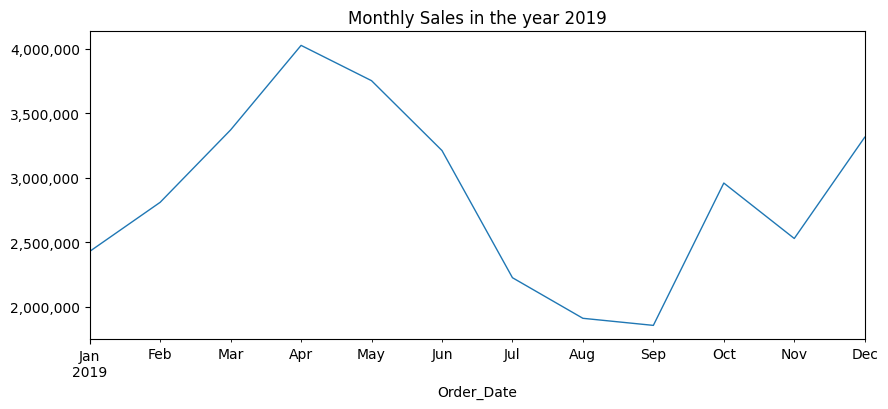

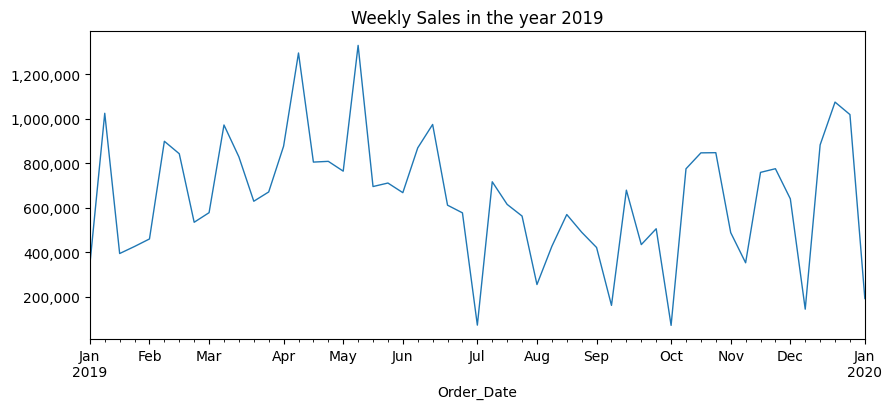

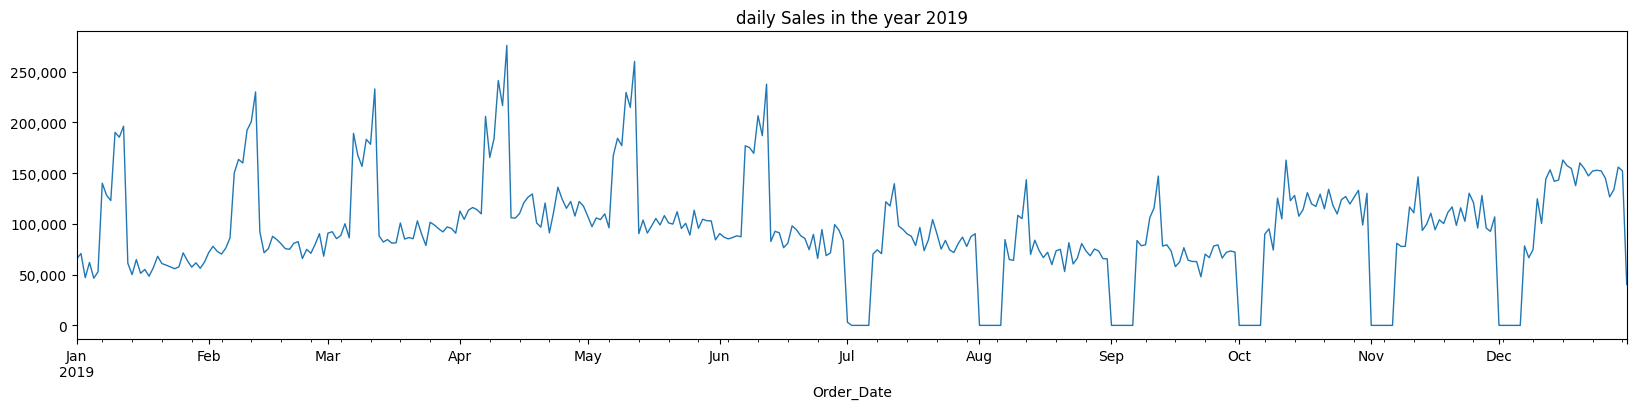

In [88]:
monthly_sales = df['Sales'].resample('M').sum()
weekly_sales = df['Sales'].resample('W').sum()
daily_sales = df['Sales'].resample('D').sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(linewidth=1)
plt.title('Monthly Sales in the year 2019')
# Format y-axis tick labels to show the full numbers
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.figure(figsize=(10,4))
weekly_sales.plot(linewidth=1)
plt.title('Weekly Sales in the year 2019')
# Format y-axis tick labels to show the full numbers
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.figure(figsize=(20,4))
daily_sales.plot(linewidth=1)
plt.title('daily Sales in the year 2019')
# Format y-axis tick labels to show the full numbers
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

#### Question 3: What are our best and worst-selling products?

In [167]:
# Group by 'Product', summing the 'Sales' and 'Quantity_ordered' columns
df_sales = df.groupby('Product').agg({'Quantity_Ordered': 'sum', 'Sales': 'sum'}).reset_index()
df_sales = df_sales.sort_values(by='Sales', ascending=False)
df_sales = pd.DataFrame(df_sales).reset_index()
df_sales = df_sales.drop('index', axis=1)
print(f"The product with the highest revenue is {df_sales['Product'][0]} with ${df_sales['Sales'][0]:,.2f}")
print(f"The product with the lowest revenue is {df_sales['Product'][18]} with ${df_sales['Sales'][18]:,.2f}")
print('--------------------------------------------------------------------------------------------------------')
print("However the Vareebadd Phone and 20in Monitor may be the worst selling products because they are the worst by qauntity and revenue in their categories")
print('--------------------------------------------------------------------------------------------------------')

The product with the highest revenue is Macbook Pro Laptop with $8,013,800.00
The product with the lowest revenue is AAA Batteries (4-pack) with $92,420.90
--------------------------------------------------------------------------------------------------------
However the Vareebadd Phone and 20in Monitor may be the worst selling products because they are the worst by qauntity and revenue in their categories
--------------------------------------------------------------------------------------------------------


In [186]:
df_sales

,Product,Quantity_Ordered,Sales
0,Macbook Pro Laptop,4714,"8,013,800.00"
1,iPhone,6832,"4,782,400.00"
2,ThinkPad Laptop,4112,"4,111,958.86"
3,Google Phone,5517,"3,310,200.00"
4,27in 4K Gaming Monitor,6233,"2,430,807.64"
5,34in Ultrawide Monitor,6188,"2,351,378.09"
6,Apple Airpods Headphones,15620,"2,343,000.00"
7,Flatscreen TV,4801,"1,440,300.00"
8,Bose SoundSport Headphones,13423,"1,342,165.75"
9,27in FHD Monitor,7531,"1,129,574.71"


#### Question 4: How do sales compare to previous months or weeks? 

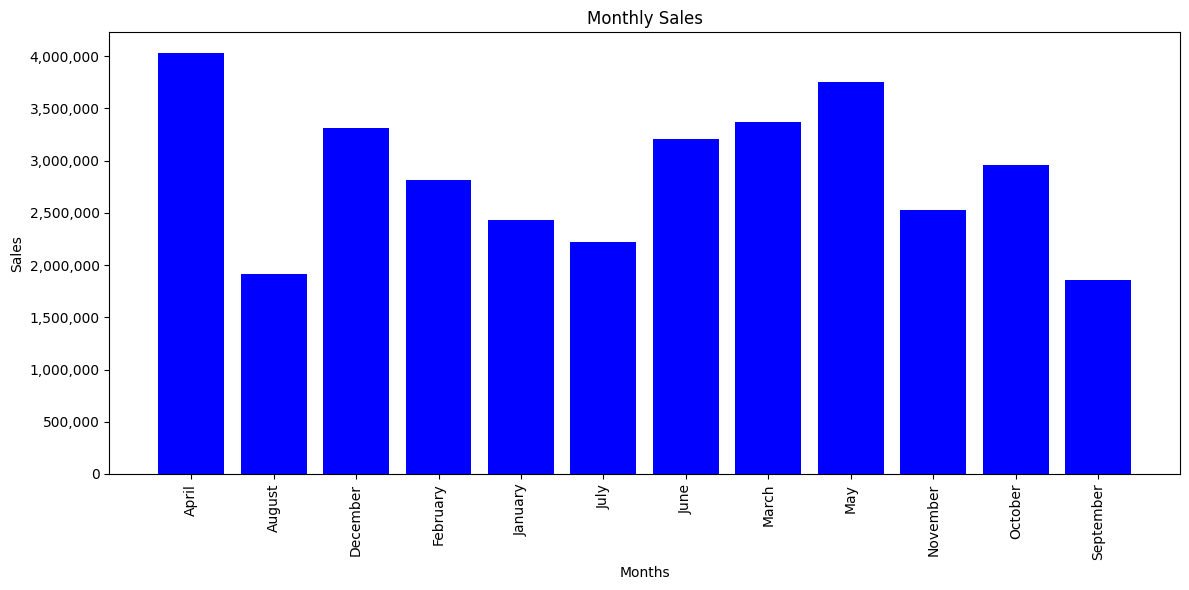

In [190]:
monthly_sales = pd.DataFrame(df.groupby(df.index.strftime('%B'))['Sales'].sum()).reset_index()
monthly_sales = monthly_sales.sort_values(by='Order_Date', ascending=True)

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['Order_Date'], monthly_sales['Sales'], color='blue')
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=90)
plt.tight_layout()



In [182]:
monthly_sales

,Order_Date,Sales
0,April,"4,026,647.58"
1,August,"1,909,881.42"
2,December,"3,314,378.12"
3,February,"2,809,644.24"
4,January,"2,428,898.65"
5,July,"2,224,768.73"
6,June,"3,210,939.59"
7,March,"3,371,228.59"
8,May,"3,752,817.97"
9,November,"2,529,016.87"


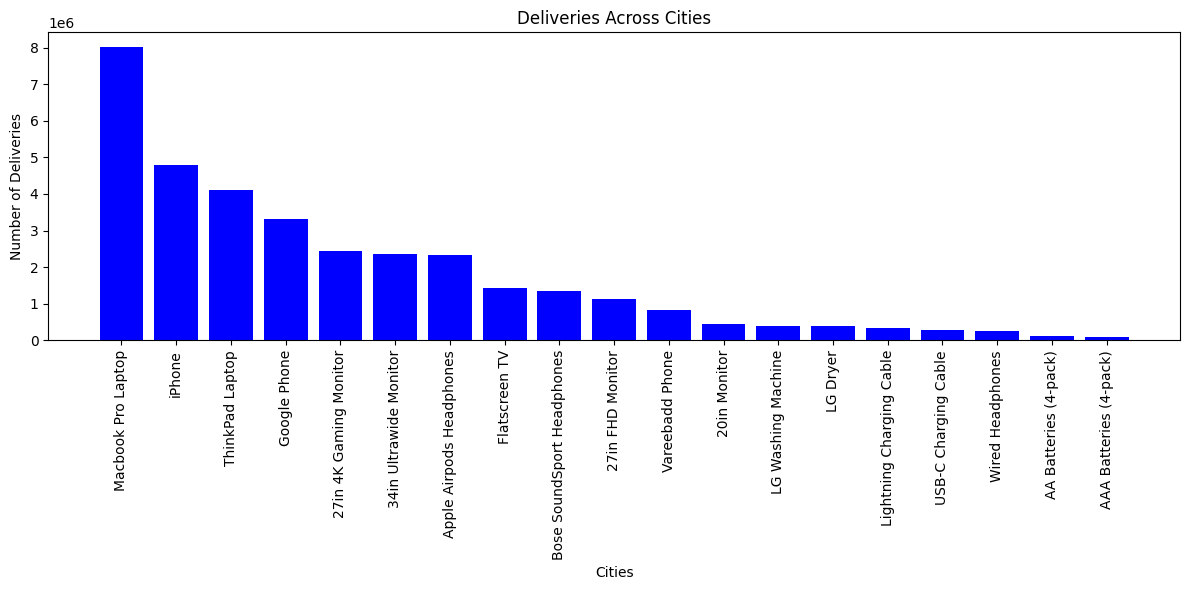

In [90]:
# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sales['Product'], df_sales['Sales'], color='blue')
plt.xlabel('Cities')
plt.ylabel('Number of Deliveries')
plt.title('Deliveries Across Cities')
plt.xticks(rotation=90)
plt.tight_layout()

In [91]:
# Extracting the city from each address in the DataFrame
df['City'] = df['Purchase_Address'].str.split(',').str[1].str.strip()

In [92]:
city_delivery = pd.DataFrame(df.groupby('City')['Order_ID'].count().reset_index(name='Deliveries'))
city_delivery

,City,Deliveries
0,Atlanta,14832
1,Austin,9878
2,Boston,19873
3,Dallas,14772
4,Los Angeles,29522
5,New York City,24807
6,Portland,12431
7,San Francisco,44587
8,Seattle,14689


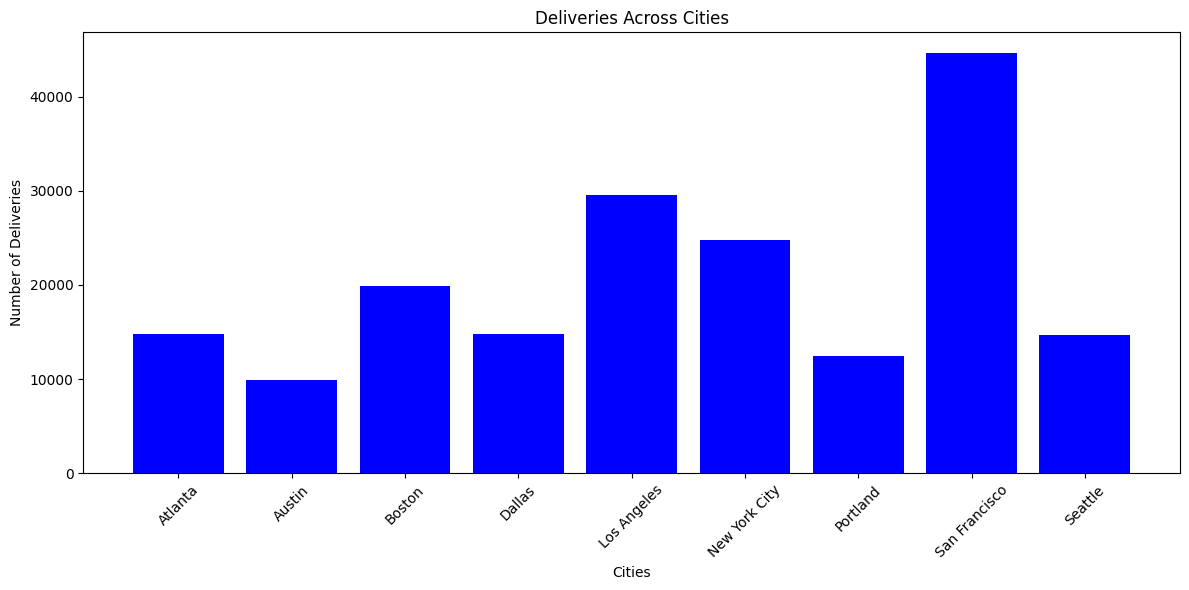

In [93]:
# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(city_delivery['City'], city_delivery['Deliveries'], color='blue')
plt.xlabel('Cities')
plt.ylabel('Number of Deliveries')
plt.title('Deliveries Across Cities')
plt.xticks(rotation=45)
plt.tight_layout()

In [191]:
df_cat_S = df.groupby('Category')['Sales'].sum().reset_index()
df_cat_S

,Category,Sales
0,Batteries,"198,182.18"
1,Charging Cables,"631,670.65"
2,Headphones,"3,930,852.84"
3,Home Appliances,"784,200.00"
4,Laptops,"12,125,758.86"
5,Mobile Phones,"8,917,800.00"
6,Monitors,"6,363,489.36"
7,Televisions,"1,440,300.00"


KeyError: 'Sales'

In [ ]:
df_cat_Q.sort_values(by='Quantity_Ordered', ascending=False)

,Category,Quantity_Ordered
0,Batteries,58452
2,Headphones,49534
1,Charging Cables,47047
6,Monitors,24059
5,Mobile Phones,14412
4,Laptops,8826
7,Televisions,4801
3,Home Appliances,1307
